In [3]:
"""
Vikas Dangi
B20238
DS3-Lab 4
"""

# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression

#PART 1

# reading the files from assignment 4
train=pd.read_csv('SteelPlateFaults-train.csv')
test=pd.read_csv('SteelPlateFaults-test.csv')
train=train.drop(["X_Minimum","Y_Minimum","TypeOfSteel_A300","TypeOfSteel_A400"],axis=1)
test=test.drop(["X_Minimum","Y_Minimum","TypeOfSteel_A300","TypeOfSteel_A400"],axis=1)


# splitting the training data according to their class
X_train0=train.loc[train['Class'] == 0]
X_train1=train.loc[train['Class'] == 1]
X_train0=X_train0.drop("Class",axis=1)
X_train1=X_train1.drop("Class",axis=1)

# Having the test data
y_test=test['Class']
X_test=test.drop("Class",axis=1)

# List containing the number of different clusters we would be creating
Q=[2,4,8,16]
high_acc=0
high_q=0
# prior probability
prior = X_train0.shape[0]/(X_train0.shape[0] + X_train1.shape[0])

# iterating through the different values of clusters
for q in Q:
    # model for class 0
    GMM0= GaussianMixture(n_components=q, covariance_type='full',reg_covar = 1e-5)
    GMM0.fit(X_train0)

    # model for class 1
    GMM1= GaussianMixture(n_components=q, covariance_type='full',reg_covar = 1e-5)
    GMM1.fit(X_train1)
    # likelihood for both the classes
    ss0=GMM0.score_samples(X_test)
    ss1=GMM1.score_samples(X_test)
    predi=[]
    for i in range(X_test.shape[0]):
        if(prior*ss0[i] > (1 - prior)*ss1[i]): 
            predi.append(0)
        else : 
            predi.append(1)
            
    # confusion matrix
    cmatrix  = confusion_matrix(y_test, predi)
    # calculating accuracy
    acc_sc = accuracy_score(y_test, predi)
    
    print("The confusion matrix for Q = ", q, " : \n", cmatrix)
    print("The accuracy score is : ", format(acc_sc, '.3f'),"\n\n")
    
    if(high_acc < acc_sc): 
        high_acc = acc_sc
        high_q = q

# printing highest accuracy anf the corresponding value of Q
print("The highest accuracy is: ",format(high_acc, '.3f'))
print("The value of Q corresponding to thehighest accuracy is: ",high_q)


The confusion matrix for Q =  2  : 
 [[117   1]
 [ 28 191]]
The accuracy score is :  0.914 


The confusion matrix for Q =  4  : 
 [[117   1]
 [ 26 193]]
The accuracy score is :  0.920 


The confusion matrix for Q =  8  : 
 [[115   3]
 [ 22 197]]
The accuracy score is :  0.926 


The confusion matrix for Q =  16  : 
 [[105  13]
 [  4 215]]
The accuracy score is :  0.950 


The highest accuracy is:  0.950
The value of Q corresponding to thehighest accuracy is:  16


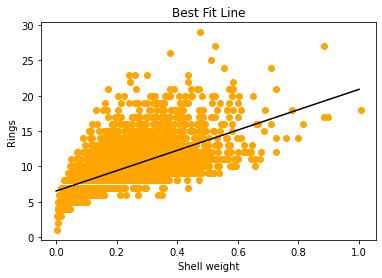


The prediction accuracy on the training data using root mean squared error is: 2.52784633913473

The prediction accuracy on the test data using root mean squared error is: 2.467940147010542


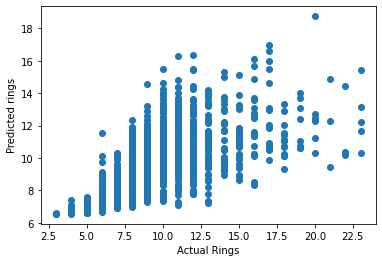

In [4]:
#PART 2
#reading file
df=pd.read_csv('abalone.csv')
X=df.iloc[:,:7]
y=df['Rings']
# splitting the data in the 3:7 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)
# saving files
X_train.to_csv('abalone-train.csv',index=False)
X_test.to_csv('abalone-test.csv',index=False)

#1

#getting our train data from the most correlated column 
sw_train=pd.DataFrame(X_train["Shell weight"])
sw_test=pd.DataFrame(X_test["Shell weight"])

# creating obj for LR
lm=LinearRegression()
model=lm.fit(sw_train,y_train)
# predicting the values based on the model
pred_train=model.predict(sw_train)
pred_test=model.predict(sw_test)

# a
linear_reg = lm.fit(np.array(sw_train).reshape(-1, 1), y_train)
xp = np.linspace(0, 1, 2923).reshape(-1, 1)
pre_line = linear_reg.predict(xp)
#scatter plot
plt.scatter(sw_train, y_train,color="orange")
#plotting best fit line
plt.plot(xp, pre_line,  color='black')
plt.xlabel('Shell weight')
plt.ylabel('Rings')
plt.title('Best Fit Line')
plt.show()


#b

# calculating RMSE error
rmse_error=np.sqrt((sum((pred_train-y_train)**2))/y_train.shape[0])
print("\nThe prediction accuracy on the training data using root mean squared error is:",rmse_error)

#c

# calculating RMSE error
rmse_error=((sum((pred_test-y_test)**2))/y_test.shape[0])**0.5
print("\nThe prediction accuracy on the test data using root mean squared error is:",rmse_error)

#d
# plotting the scatter plot
plt.scatter(y_test,pred_test)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted rings")
plt.show()




The prediction accuracy on the training data using root mean squared error is: 2.2161824877304053

The prediction accuracy on the test data using root mean squared error is: 2.2192193506637916


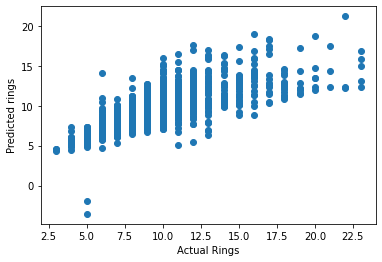

In [5]:
#2
# creating the object for Linear Regression
lm = LinearRegression()
model=lm.fit(X_train, y_train)
# predicting the training and test data from the model
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)

#a
# calculating RMSE error
rmse_error=np.sqrt((sum((pred_train-y_train)**2))/y_train.shape[0])
print("\nThe prediction accuracy on the training data using root mean squared error is:",rmse_error)

#b
# calculating RMSE error
rmse_error=((sum((pred_test-y_test)**2))/y_test.shape[0])**0.5
print("\nThe prediction accuracy on the test data using root mean squared error is:",rmse_error)

# c
# plotting the scatter plot
plt.scatter(y_test,pred_test)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted rings")
plt.show()



Prediction accuracy on the training data for the different values of degree of the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE): 
[2.49929735307915, 2.4756692354435894, 2.467194838651595, 2.4659500526208022]


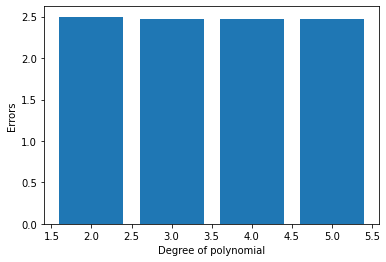


Prediction accuracy on the test data for the different values of degree of the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE): 
[2.433760976268947, 2.4106216818398, 2.4083251670641936, 2.4095435183942486]


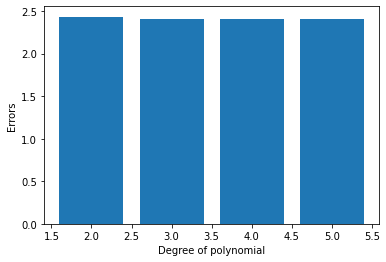

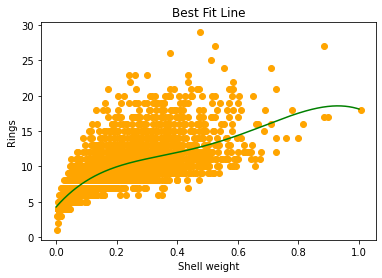

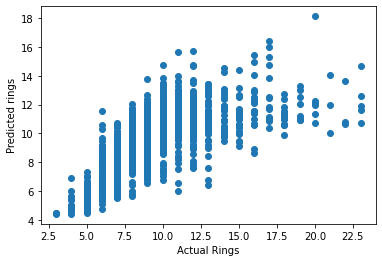

In [6]:
# 3
# importing module to preprocess data for polynoial regression
from sklearn.preprocessing import PolynomialFeatures
# stores the degree of polynomials we will be using 
degree=[2, 3, 4, 5]
errors=[]

# a
for d in degree:
    poly_features = PolynomialFeatures(d)
    x_poly = poly_features.fit_transform(sw_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    pred_train = regressor.predict(x_poly)
    rmse_error=np.sqrt((sum((pred_train-y_train)**2))/y_train.shape[0])
    errors.append(rmse_error)
print("\nPrediction accuracy on the training data for the different values of degree of the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE): ")
print(errors)

# Bar plot of Degree vs Errors
plt.bar(degree,errors)
plt.xlabel("Degree of polynomial")
plt.ylabel("Errors")
plt.show()



# b
best_pred=[]
best_error=100
errors=[]
p=0
# itterating from all the degrees
for d in degree:
    poly_features = PolynomialFeatures(d)
    x_poly = poly_features.fit_transform(sw_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    # converting the testing data in the polynoial form
    test_poly=poly_features.fit_transform(sw_test)
    pred_test = regressor.predict(test_poly)
    rmse_error=np.sqrt((sum((pred_test-y_test)**2))/y_test.shape[0])
    errors.append(rmse_error)
    if(best_error>rmse_error):
        best_error=rmse_error
        best_pred=pred_test
        p=d

# printing the errors
print("\nPrediction accuracy on the test data for the different values of degree of the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE): ")
print(errors)

# Bar plot of Degree vs Errors
plt.bar(degree,errors)
plt.xlabel("Degree of polynomial")
plt.ylabel("Errors")
plt.show()

# c

# object creation
poly_features = PolynomialFeatures(p)
x_poly = poly_features.fit_transform(sw_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)
xp = np.linspace(0, 1, 2923).reshape(-1, 1)
test_poly=poly_features.fit_transform(xp)
pred_test = regressor.predict(test_poly)
# plotting the scatter plot
plt.scatter(sw_train, y_train,color="orange")
#plotting best fit line
plt.plot(xp, pred_test,  color='green')
plt.xlabel('Shell weight')
plt.ylabel('Rings')
plt.title('Best Fit Line')
plt.show()

#d
# plotting the scatter plot
plt.scatter(y_test,best_pred)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted rings")
plt.show()



Prediction accuracy on the training data for the different values of degree of the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE): 
[2.079616168292698, 1.992418002777894, 1.8408922784102881, 1.6392422418315455]


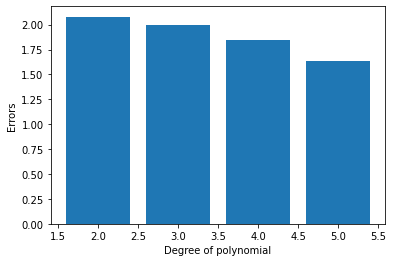


Prediction accuracy on the test data for the different values of degree of the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE): 
[2.1846309140909588, 2.7167920363639473, 18.916833070942616, 437.9548777418304]


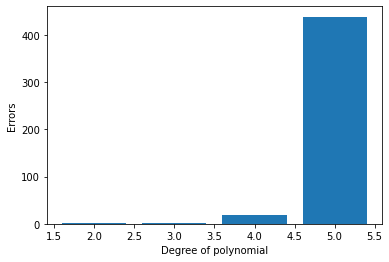

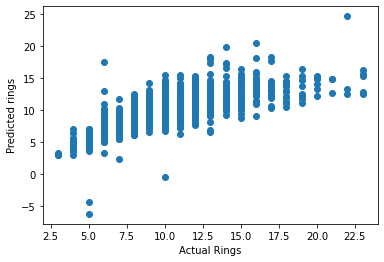

In [7]:
# 4

# a
errors=[]
# itterating from all the degrees
for d in degree:
    # creating the object
    poly_features = PolynomialFeatures(d)
    x_poly = poly_features.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    pred_train = regressor.predict(x_poly)
    rmse_error=np.sqrt((sum((pred_train-y_train)**2))/y_train.shape[0])
    errors.append(rmse_error)
# printing the errors
print("\nPrediction accuracy on the training data for the different values of degree of the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE): ")
print(errors)

# Bar plot of Degree vs Errors
plt.bar(degree,errors)
plt.xlabel("Degree of polynomial")
plt.ylabel("Errors")
plt.show()

# b
best_pred=[]
best_error=100
errors=[]
p=0
# itterating from all the degrees
for d in degree:
    # creating the object
    poly_features = PolynomialFeatures(d)
    x_poly = poly_features.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(x_poly, y_train)
    test_poly=poly_features.fit_transform(X_test)
    pred_test = regressor.predict(test_poly)
    rmse_error=np.sqrt((sum((pred_test-y_test)**2))/y_test.shape[0])
    errors.append(rmse_error)
    if(best_error>rmse_error):
        best_error=rmse_error
        best_pred=pred_test
        p=d

print("\nPrediction accuracy on the test data for the different values of degree of the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE): ")
print(errors)

# Bar plot of Degree vs Errors

plt.bar(degree,errors)
plt.xlabel("Degree of polynomial")
plt.ylabel("Errors")
plt.show()


# c
# plotting the scatter plot
plt.scatter(y_test,best_pred)
plt.xlabel("Actual Rings")
plt.ylabel("Predicted rings")
plt.show()
